In [1]:
# Time Series fundamentals with TensorFlow
# We are going to predict price of BITCOIN based on the historical price of Bitcoin

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-11 09:56:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-02-11 09:56:17 (6.93 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:


# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()
     


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:


# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()
     


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


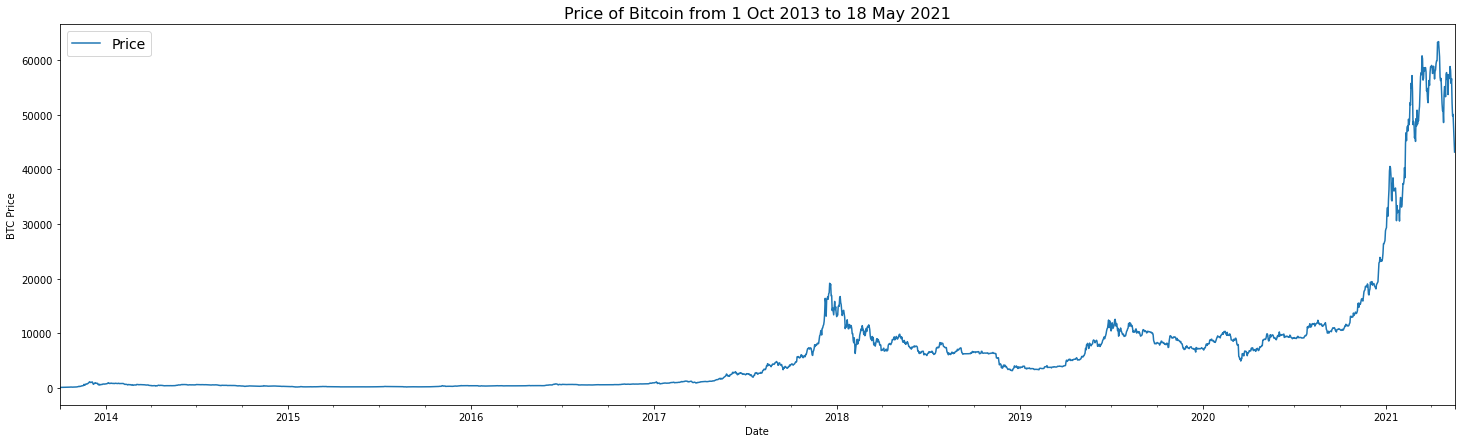

In [7]:


import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(25, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);
     


In [8]:


# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]
     


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

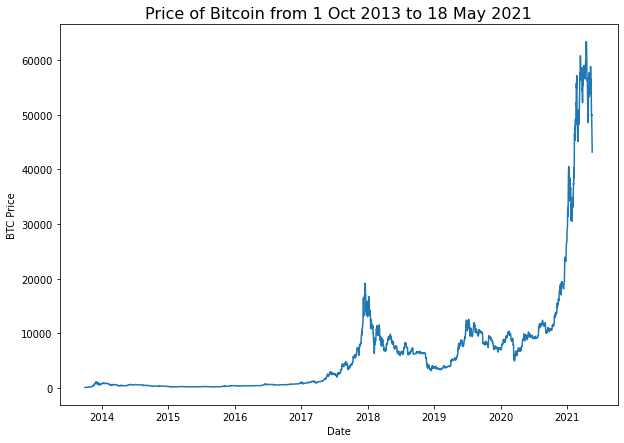

In [9]:


# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");
     


In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]
     

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:

# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

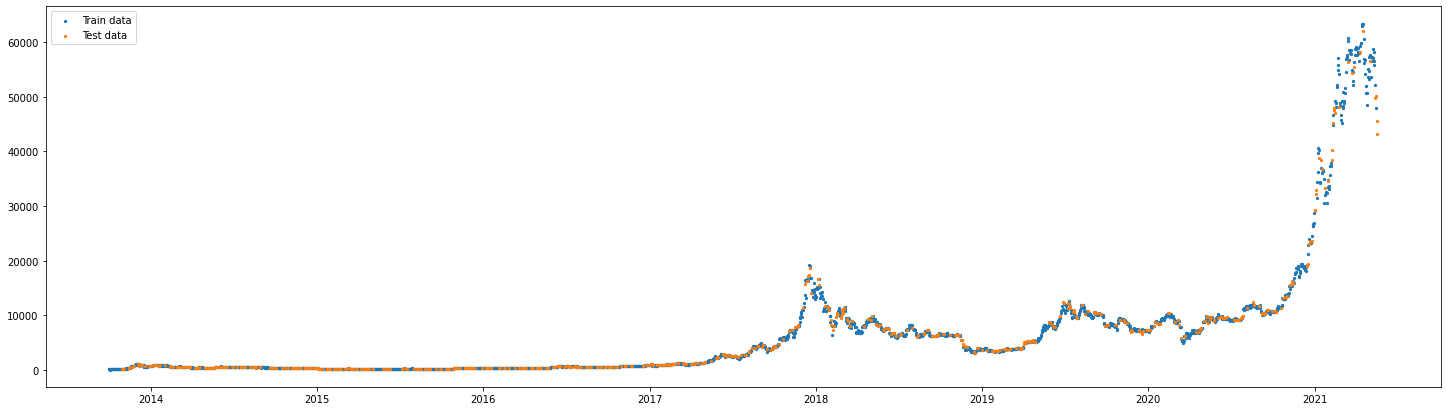

In [12]:
plt.figure(figsize = (25,7))
plt.scatter(X_train,y_train, s = 5, label = "Train data")
plt.scatter(X_test,y_test,s = 5, label = "Test data")

plt.legend()
plt.show();

In [13]:


# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)
     


(2229, 558, 2229, 558)

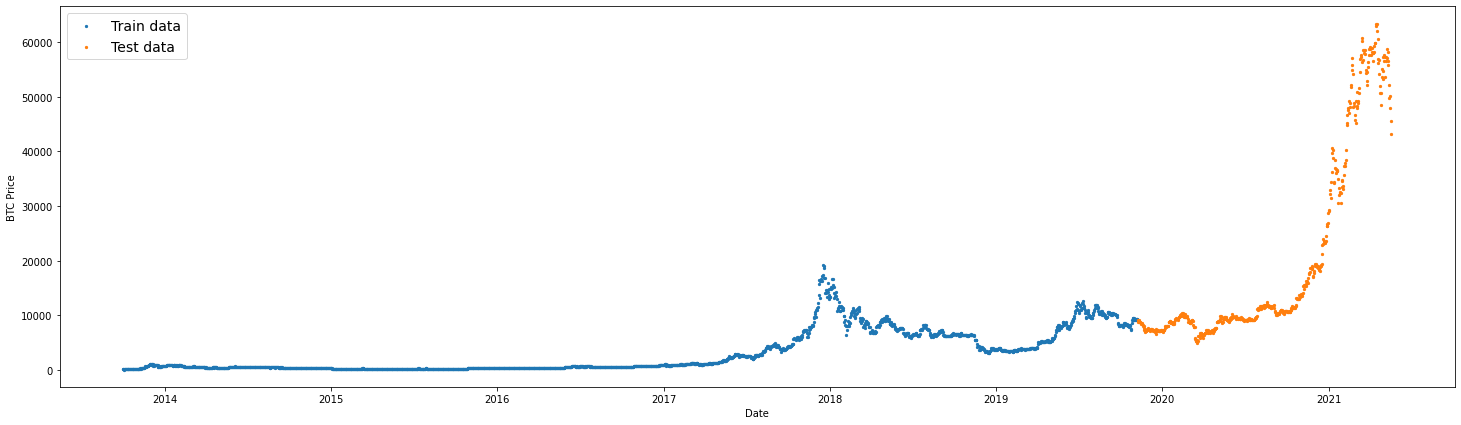

In [14]:


# Plot correctly made splits
plt.figure(figsize=(25, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();
     


In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)
     


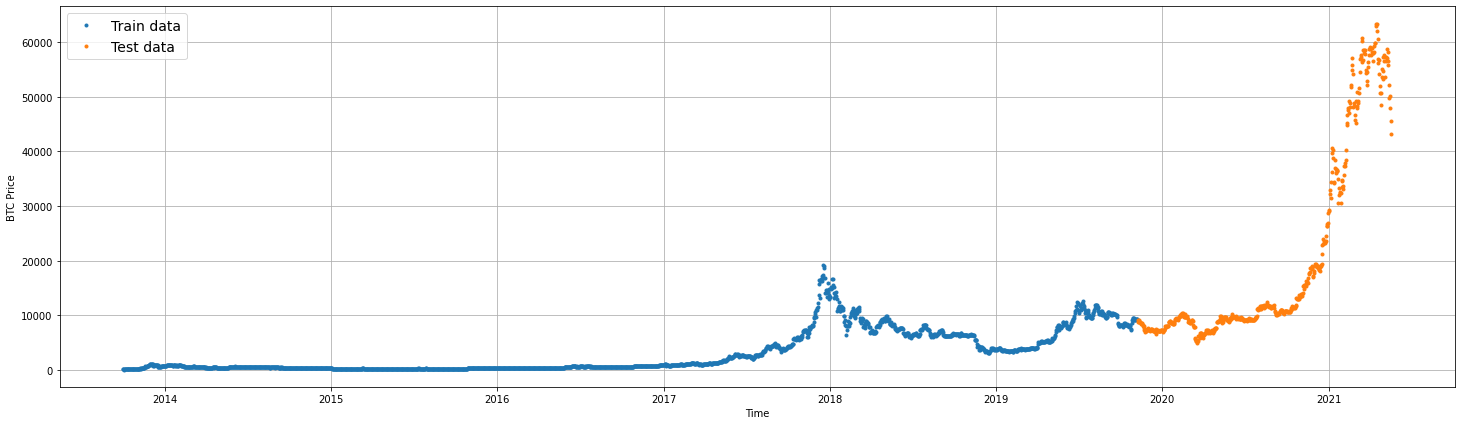

In [16]:
# Try out our plotting function
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Building baseline naive model

Models formula:

$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 
     

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

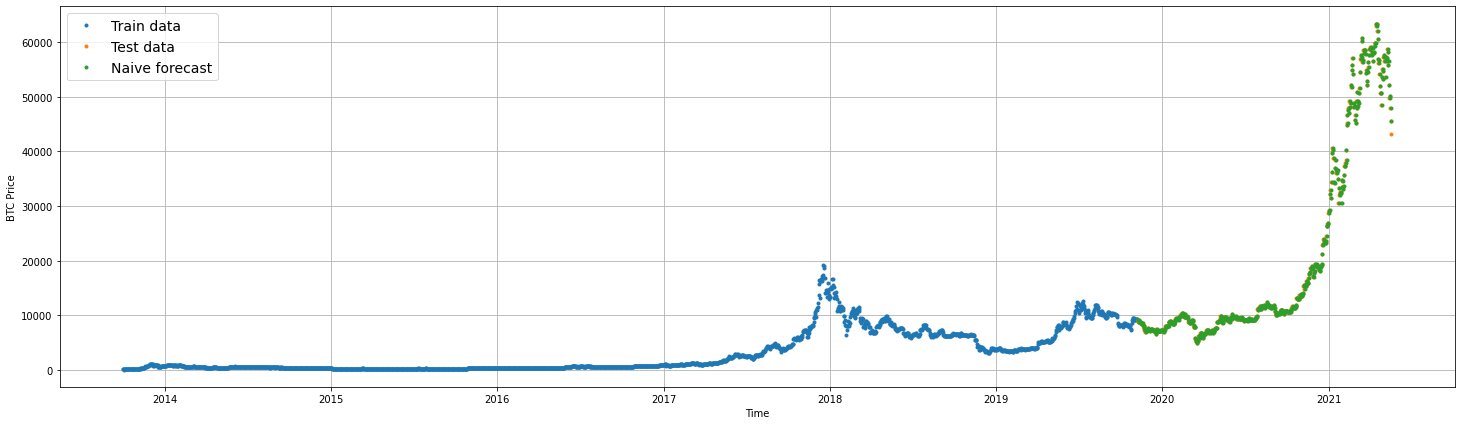

In [18]:

# Plot naive forecast
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive forecast");
     


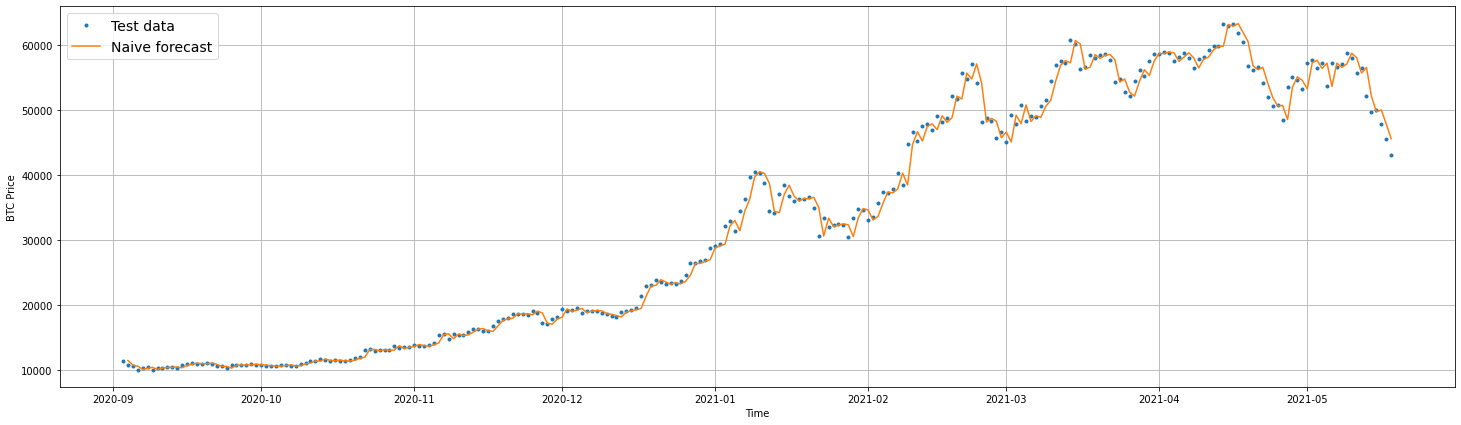

In [19]:


plt.figure(figsize=(25, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");
     


In [20]:
import tensorflow as tf
import numpy as np

In [21]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season
     


def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     


In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [23]:


# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()
     


20056.632963737222

In [24]:
HORIZON = 1
WINDOW_SIZE = 7

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]
     



In [25]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
def make_windows(x,window_size = WINDOW_SIZE, horizon = HORIZON):

  """
  Turns 1D array into a 2D array of sequential labelled windows of window_size with hirizon size labels.
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)
  window_indx = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)),axis=0).T
  windowed_array = np.array(x)[window_indx]
  windows,labels = get_labelled_windows(windowed_array,horizon=horizon)
  return windows,labels



In [27]:
full_windows, full_labels = make_windows(btc_price)

len(full_windows), len(full_labels)

(2780, 2780)

In [28]:
for i in range(3):
  print(f'Windows: {full_windows[i]} - > Label: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] - > Label: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] - > Label: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] - > Label: [125.96116]


In [29]:
def make_train_test_splits(windows, labels, test_split = 0.2):

  """
  Splits matching pairs of windows and labels into train and test sets
  """  
  split_size = int(len(windows)*(1-test_split))
  
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels



In [30]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [31]:
import os
import tensorflow as tf

def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_loss',
                                            verbose = 0,
                                            save_best_only = True)

## Model 1: Dense model (window = 7, horizon = 1)

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
], name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 3902.9387 - mae: 3902.9387 - mse: 37740976.0000  

18/18 [==============================] - 9s 100ms/step - loss: 3153.4338 - mae: 3153.4338 - mse: 26634116.0000 - val_loss: 7069.5708 - val_mae: 7069.5708 - val_mse: 89494416.0000
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 498.4208 - mae: 498.4208 - mse: 846108.8125 

18/18 [==============================] - 2s 101ms/step - loss: 473.9149 - mae: 473.9149 - mse: 773669.3125 - val_loss: 1119.0564 - val_mae: 1119.0564 - val_mse: 4084368.5000
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 232.8353 - mae: 232.8353 - mse: 243419.1562

18/18 [==============================] - 1s 83ms/step - loss: 218.9954 - mae: 218.9954 - mse: 218225.3750 - val_loss: 1068.4041 - val_mae: 1068.4041 - val_mse: 3776900.5000
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 191.7990 - mae: 191.7990 - mse: 189888.5469

18/18 [==============================] - 1s 48ms/step - loss: 187.0076 - mae: 187.0076 - mse: 179310.9375 - val_loss: 988.2991 - val_mae: 988.2991 - val_mse: 3326733.2500
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 185.6872 - mae: 185.6872 - mse: 182134.0625

18/18 [==============================] - 1s 67ms/step - loss: 174.1969 - mae: 174.1969 - mse: 160813.9688 - val_loss: 954.5892 - val_mae: 954.5892 - val_mse: 2998621.0000
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 163.5135 - mae: 163.5135 - mse: 135779.5625

18/18 [==============================] - 1s 82ms/step - loss: 166.9985 - mae: 166.9985 - mse: 149181.7344 - val_loss: 903.1645 - val_mae: 903.1645 - val_mse: 2823730.0000
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 164.9168 - mae: 164.9168 - mse: 147824.3906

18/18 [==============================] - 1s 65ms/step - loss: 160.3698 - mae: 160.3698 - mse: 139876.6875 - val_loss: 899.0526 - val_mae: 899.0526 - val_mse: 2646110.5000
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 154.7585 - mae: 154.7585 - mse: 132305.1875

18/18 [==============================] - 1s 63ms/step - loss: 156.0105 - mae: 156.0105 - mse: 133111.9062 - val_loss: 854.9092 - val_mae: 854.9092 - val_mse: 2505275.0000
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 153.5127 - mae: 153.5127 - mse: 120586.7578

18/18 [==============================] - 1s 60ms/step - loss: 153.0339 - mae: 153.0339 - mse: 128654.2422 - val_loss: 845.5037 - val_mae: 845.5037 - val_mse: 2337766.0000
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 143.3790 - mae: 143.3790 - mse: 106043.0391

18/18 [==============================] - 1s 41ms/step - loss: 148.1823 - mae: 148.1823 - mse: 122044.9375 - val_loss: 802.8057 - val_mae: 802.8057 - val_mse: 2171389.5000
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 141.6950 - mae: 141.6950 - mse: 112572.2734

18/18 [==============================] - 0s 28ms/step - loss: 141.2063 - mae: 141.2063 - mse: 111178.0547 - val_loss: 799.0663 - val_mae: 799.0663 - val_mse: 2067330.2500
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 136.8736 - mae: 136.8736 - mse: 106235.5938 - val_loss: 820.8155 - val_mae: 820.8155 - val_mse: 2067431.6250
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 137.1189 - mae: 137.1189 - mse: 105622.1172 - val_loss: 853.5680 - val_mae: 853.5680 - val_mse: 2131047.2500
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 134.2145 - mae: 134.2145 - mse: 99823.6328 - val_loss: 804.8285 - val_mae: 804.8285 - val_mse: 1960137.6250
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6443 - mae: 134.6443 - mse: 69152.8984

18/18 [==============================] - 0s 28ms/step - loss: 130.3654 - mae: 130.3654 - mse: 96982.8984 - val_loss: 706.6551 - val_mae: 706.6551 - val_mse: 1698007.0000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5873 - mae: 125.5873 - mse: 90752.0156 - val_loss: 729.6836 - val_mae: 729.6836 - val_mse: 1701301.8750
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3091 - mae: 124.3091 - mse: 90043.0312 - val_loss: 728.4748 - val_mae: 728.4748 - val_mse: 1674833.1250
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 123.2001 - mae: 123.2001 - mse: 89616.4688 - val_loss: 707.0247 - val_mae: 707.0247 - val_mse: 1600479.1250
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3861 - mae: 121.3861 - mse: 86325.8516 - val_loss: 745.5257 - val_mae: 745.5257 - val_mse: 1694133.6250
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 119.9139 - mae: 119.9139 - mse: 

18/18 [==============================] - 1s 29ms/step - loss: 119.9139 - mae: 119.9139 - mse: 83726.0469 - val_loss: 657.2328 - val_mae: 657.2328 - val_mse: 1494976.8750
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 120.9816 - mae: 120.9816 - mse: 86626.3516

18/18 [==============================] - 1s 39ms/step - loss: 120.9816 - mae: 120.9816 - mse: 86626.3516 - val_loss: 650.1736 - val_mae: 650.1736 - val_mse: 1437410.8750
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 123.2150 - mae: 123.2150 - mse: 92837.4922 

18/18 [==============================] - 1s 42ms/step - loss: 117.5882 - mae: 117.5882 - mse: 82583.0703 - val_loss: 644.1224 - val_mae: 644.1224 - val_mse: 1412006.6250
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 115.8894 - mae: 115.8894 - mse: 74288.4297

18/18 [==============================] - 1s 42ms/step - loss: 117.6229 - mae: 117.6229 - mse: 81570.9844 - val_loss: 634.9758 - val_mae: 634.9758 - val_mse: 1390378.6250
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 118.7066 - mae: 118.7066 - mse: 88815.0078

18/18 [==============================] - 1s 35ms/step - loss: 116.2970 - mae: 116.2970 - mse: 81594.8984 - val_loss: 628.3283 - val_mae: 628.3283 - val_mse: 1375789.2500
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 117.6803 - mae: 117.6803 - mse: 82001.7031

18/18 [==============================] - 0s 28ms/step - loss: 115.3116 - mae: 115.3116 - mse: 78585.1719 - val_loss: 623.6732 - val_mae: 623.6732 - val_mse: 1358145.3750
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0403 - mae: 115.0403 - mse: 78888.4062 - val_loss: 626.7496 - val_mae: 626.7496 - val_mse: 1345300.0000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9919 - mae: 158.9919 - mse: 119006.8047

18/18 [==============================] - 1s 29ms/step - loss: 115.4322 - mae: 115.4322 - mse: 78000.9141 - val_loss: 623.3676 - val_mae: 623.3676 - val_mse: 1356175.6250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 102.2133 - mae: 102.2133 - mse: 57033.0117

18/18 [==============================] - 0s 28ms/step - loss: 112.1681 - mae: 112.1681 - mse: 77040.7344 - val_loss: 612.1219 - val_mae: 612.1219 - val_mse: 1318130.2500
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3553 - mae: 112.3553 - mse: 76786.1094 - val_loss: 613.8450 - val_mae: 613.8450 - val_mse: 1323978.5000
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4330 - mae: 116.4330 - mse: 79306.8984 - val_loss: 615.6940 - val_mae: 615.6940 - val_mse: 1308490.8750
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8409 - mae: 119.8409 - mse: 79487.3672 - val_loss: 662.1561 - val_mae: 662.1561 - val_mse: 1412380.3750
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 120.8399 - mae: 120.8399 - mse: 76791.7656

18/18 [==============================] - 1s 29ms/step - loss: 114.5943 - mae: 114.5943 - mse: 79473.5234 - val_loss: 603.6826 - val_mae: 603.6826 - val_mse: 1280878.2500
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9400 - mae: 112.9400 - mse: 75891.2422 - val_loss: 667.7188 - val_mae: 667.7188 - val_mse: 1420889.2500
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0372 - mae: 112.0372 - mse: 77028.1719 - val_loss: 609.4993 - val_mae: 609.4993 - val_mse: 1302629.6250
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 104.2006 - mae: 104.2006 - mse: 60089.2344

18/18 [==============================] - 1s 42ms/step - loss: 110.8736 - mae: 110.8736 - mse: 76214.9844 - val_loss: 595.2292 - val_mae: 595.2292 - val_mse: 1262637.8750
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 150.9742 - mae: 150.9742 - mse: 146668.6094

18/18 [==============================] - 1s 29ms/step - loss: 112.8237 - mae: 112.8237 - mse: 75842.8984 - val_loss: 593.5204 - val_mae: 593.5204 - val_mse: 1255858.1250
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8446 - mae: 109.8446 - mse: 74714.2344 - val_loss: 607.6852 - val_mae: 607.6852 - val_mse: 1278057.3750
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4707 - mae: 112.4707 - mse: 75931.3359 - val_loss: 598.2119 - val_mae: 598.2119 - val_mse: 1268473.7500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 131.0516 - mae: 131.0516 - mse: 110371.5391

18/18 [==============================] - 0s 29ms/step - loss: 109.4557 - mae: 109.4557 - mse: 74010.7109 - val_loss: 591.4539 - val_mae: 591.4539 - val_mse: 1243462.6250
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1863 - mae: 109.1863 - mse: 73019.5000 - val_loss: 628.8188 - val_mae: 628.8188 - val_mse: 1339585.8750
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 110.8113 - mae: 110.8113 - mse: 73373.3984

18/18 [==============================] - 1s 30ms/step - loss: 110.8113 - mae: 110.8113 - mse: 73373.3984 - val_loss: 589.9208 - val_mae: 589.9208 - val_mse: 1236856.0000
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8313 - mae: 115.8313 - mse: 78425.0469 - val_loss: 622.4465 - val_mae: 622.4465 - val_mse: 1302426.0000
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7827 - mae: 112.7827 - mse: 73597.4062 - val_loss: 643.9973 - val_mae: 643.9973 - val_mse: 1374029.0000
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7925 - mae: 112.7925 - mse: 74512.7734 - val_loss: 594.1565 - val_mae: 594.1565 - val_mse: 1241626.2500
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4558 - mae: 109.4558 - mse: 73601.7734 - val_loss: 612.0818 - val_mae: 612.0818 - val_mse: 1290926.8750
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8180 - mae: 109.8180 - m

18/18 [==============================] - 0s 28ms/step - loss: 113.9128 - mae: 113.9128 - mse: 75927.3203 - val_loss: 584.5734 - val_mae: 584.5734 - val_mse: 1216034.6250
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 110.4133 - mae: 110.4133 - mse: 73658.1172

18/18 [==============================] - 1s 30ms/step - loss: 110.4133 - mae: 110.4133 - mse: 73658.1172 - val_loss: 580.4623 - val_mae: 580.4623 - val_mse: 1209765.7500
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6832 - mae: 111.6832 - mse: 75205.9844 - val_loss: 639.5034 - val_mae: 639.5034 - val_mse: 1331652.3750
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6926 - mae: 111.6926 - mse: 73275.5156 - val_loss: 616.1288 - val_mae: 616.1288 - val_mse: 1292077.7500
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 118.2870 - mae: 118.2870 - mse: 81249.0078 

18/18 [==============================] - 1s 30ms/step - loss: 116.9968 - mae: 116.9968 - mse: 79783.2969 - val_loss: 579.2070 - val_mae: 579.2070 - val_mse: 1205686.3750
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7212 - mae: 110.7212 - mse: 73476.2031 - val_loss: 792.1848 - val_mae: 792.1848 - val_mse: 1809815.2500
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0091 - mae: 126.0091 - mse: 84476.6562 - val_loss: 647.1594 - val_mae: 647.1594 - val_mse: 1368426.7500
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 120.0521 - mae: 120.0521 - mse: 76904.9766 - val_loss: 583.2601 - val_mae: 583.2601 - val_mse: 1209633.3750
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3676 - mae: 108.3676 - mse: 72479.6328 - val_loss: 605.3901 - val_mae: 605.3901 - val_mse: 1264569.5000
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5925 - mae: 110.5925 - m

18/18 [==============================] - 1s 30ms/step - loss: 109.7420 - mae: 109.7420 - mse: 74042.0703 - val_loss: 578.3995 - val_mae: 578.3995 - val_mse: 1197640.0000
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2434 - mae: 109.2434 - mse: 72532.2578 - val_loss: 625.7056 - val_mae: 625.7056 - val_mse: 1310391.0000
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9363 - mae: 113.9363 - mse: 75837.2266 - val_loss: 633.3604 - val_mae: 633.3604 - val_mse: 1314002.1250
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8553 - mae: 109.8553 - mse: 72741.0859 - val_loss: 604.8716 - val_mae: 604.8716 - val_mse: 1250179.6250
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 132.3520 - mae: 132.3520 - mse: 171666.6719

18/18 [==============================] - 1s 30ms/step - loss: 109.3071 - mae: 109.3071 - mse: 73106.1641 - val_loss: 577.6384 - val_mae: 577.6384 - val_mse: 1198614.7500
Epoch 66/100
14/18 [======================>.......] - ETA: 0s - loss: 106.1956 - mae: 106.1956 - mse: 65960.6562

18/18 [==============================] - 1s 44ms/step - loss: 107.9047 - mae: 107.9047 - mse: 71881.5859 - val_loss: 576.1524 - val_mae: 576.1524 - val_mse: 1191421.1250
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0107 - mae: 107.0107 - mse: 70529.8906 - val_loss: 643.3199 - val_mae: 643.3199 - val_mse: 1351616.5000
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 112.9748 - mae: 112.9748 - mse: 70835.9688 - val_loss: 662.2560 - val_mae: 662.2560 - val_mse: 1401266.0000
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 119.2053 - mae: 119.2053 - mse: 77930.7031 - val_loss: 630.0364 - val_mae: 630.0364 - val_mse: 1302728.2500
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 121.5093 - mae: 121.5093 - mse: 79562.1875 - val_loss: 637.4920 - val_mae: 637.4920 - val_mse: 1318863.2500
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 114.6535 - mae: 114.6535 - m

18/18 [==============================] - 1s 35ms/step - loss: 109.6395 - mae: 109.6395 - mse: 72196.6406 - val_loss: 575.7451 - val_mae: 575.7451 - val_mse: 1186168.1250
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 73.7971 - mae: 73.7971 - mse: 22919.7051

18/18 [==============================] - 0s 29ms/step - loss: 108.4762 - mae: 108.4762 - mse: 71697.5469 - val_loss: 572.2880 - val_mae: 572.2880 - val_mse: 1180805.1250
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4665 - mae: 107.4665 - mse: 70890.5391 - val_loss: 573.5440 - val_mae: 573.5440 - val_mse: 1181549.6250
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6870 - mae: 108.6870 - mse: 70020.5234 - val_loss: 582.2075 - val_mae: 582.2075 - val_mse: 1203042.3750
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1448 - mae: 108.1448 - mse: 72912.7891 - val_loss: 592.6730 - val_mae: 592.6730 - val_mse: 1226293.8750
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4398 - mae: 107.4398 - mse: 71890.4609 - val_loss: 607.7269 - val_mae: 607.7269 - val_mse: 1248463.5000
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1380 - mae: 108.1380 - m

18/18 [==============================] - 1s 43ms/step - loss: 113.4120 - mae: 113.4120 - mse: 74357.4609 - val_loss: 571.4137 - val_mae: 571.4137 - val_mse: 1176587.2500
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5173 - mae: 106.5173 - mse: 71180.6562 - val_loss: 574.2877 - val_mae: 574.2877 - val_mse: 1180874.1250
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9274 - mae: 106.9274 - mse: 70342.9219 - val_loss: 574.3443 - val_mae: 574.3443 - val_mse: 1181186.5000
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4089 - mae: 106.4089 - mse: 69896.5312 - val_loss: 591.2837 - val_mae: 591.2837 - val_mse: 1221143.0000
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8766 - mae: 107.8766 - mse: 72029.1875 - val_loss: 590.2340 - val_mae: 590.2340 - val_mse: 1218899.8750
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4160 - mae: 108.4160 - m

18/18 [==============================] - 1s 31ms/step - loss: 106.9826 - mae: 106.9826 - mse: 70508.5547 - val_loss: 570.1103 - val_mae: 570.1103 - val_mse: 1172815.8750
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 106.1574 - mae: 106.1574 - mse: 70595.2500 - val_loss: 570.6198 - val_mae: 570.6198 - val_mse: 1173737.5000
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6030 - mae: 107.6030 - mse: 71560.6094 - val_loss: 570.7833 - val_mae: 570.7833 - val_mse: 1173886.2500
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 117.9035 - mae: 117.9035 - mse: 73806.1016 - val_loss: 676.4866 - val_mae: 676.4866 - val_mse: 1411113.3750


In [33]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 676.4866 - mae: 676.4866 - mse: 1411113.2500


[676.486572265625, 676.486572265625, 1411113.25]

In [34]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')

In [35]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.1100 - mae: 570.1100 - mse: 1172815.2500


[570.1100463867188, 570.1100463867188, 1172815.25]

In [36]:
def make_preds(model, input_data):
  
  """
  Makes prediction using provided model and input data.

  Args:
    model: model that will do prediction
    input_data: set of data to make predicition on

  Returns:
    prediction: an array of values predicted by our model
  """

  prediction = model.predict(input_data)
  
  return tf.squeeze(prediction)

In [37]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [38]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

model_1_results

{'mae': 570.11005,
 'mse': 1172815.2,
 'rmse': 1082.966,
 'mape': 2.5379467,
 'mase': 1.0015254}

In [39]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

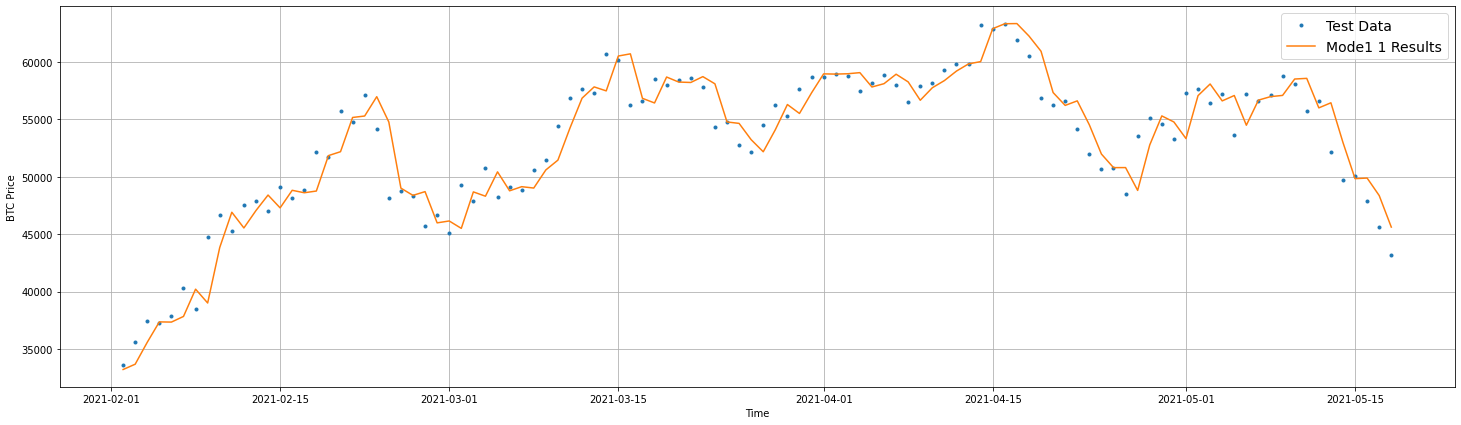

In [40]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 1 Results")


## Model 2: Dense model (window size = 30, horizon = 1)

In [41]:
HORIZON = 1
WINDOW_SIZE = 30


In [42]:
full_windows, full_labels = make_windows(btc_price)

len(full_windows), len(full_labels)

(2780, 2780)

In [43]:
for i in range(3):
  print(f'Windows: {full_windows[i]} - > Label: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] - > Label: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] - > Label: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] - > Label: [125.96116]


In [44]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [45]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
], name = 'model_2_dense')

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2643.5269 - mae: 2643.5269 - mse: 19030210.0000 

18/18 [==============================] - 1s 37ms/step - loss: 2643.5269 - mae: 2643.5269 - mse: 19030210.0000 - val_loss: 4951.6387 - val_mae: 4951.6387 - val_mse: 44601940.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 379.2606 - mae: 379.2606 - mse: 503879.0938 

18/18 [==============================] - 1s 31ms/step - loss: 379.2606 - mae: 379.2606 - mse: 503879.0938 - val_loss: 1022.1324 - val_mae: 1022.1324 - val_mse: 3039141.2500
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 213.6694 - mae: 213.6694 - mse: 207718.2188

18/18 [==============================] - 1s 30ms/step - loss: 213.6694 - mae: 213.6694 - mse: 207718.2188 - val_loss: 924.2043 - val_mae: 924.2043 - val_mse: 2854650.2500
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 169.0623 - mae: 169.0623 - mse: 150927.0000

18/18 [==============================] - 1s 40ms/step - loss: 169.2956 - mae: 169.2956 - mse: 148629.2812 - val_loss: 903.4894 - val_mae: 903.4894 - val_mse: 2676563.0000
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 164.7647 - mae: 164.7647 - mse: 145782.0938 - val_loss: 928.7950 - val_mae: 928.7950 - val_mse: 2649951.2500
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 157.4987 - mae: 157.4987 - mse: 122849.9922

18/18 [==============================] - 1s 43ms/step - loss: 158.6953 - mae: 158.6953 - mse: 136491.2812 - val_loss: 872.8895 - val_mae: 872.8895 - val_mse: 2511493.5000
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 154.6737 - mae: 154.6737 - mse: 131677.3594 - val_loss: 879.6667 - val_mae: 879.6667 - val_mse: 2422549.0000
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 151.9744 - mae: 151.9744 - mse: 128048.8828

18/18 [==============================] - 1s 42ms/step - loss: 152.7092 - mae: 152.7092 - mse: 127952.4062 - val_loss: 843.9218 - val_mae: 843.9218 - val_mse: 2336902.2500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 152.4492 - mae: 152.4492 - mse: 127851.9141 - val_loss: 876.2249 - val_mae: 876.2249 - val_mse: 2335025.2500
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 149.1077 - mae: 149.1077 - mse: 123360.7891

18/18 [==============================] - 0s 28ms/step - loss: 149.1077 - mae: 149.1077 - mse: 123360.7891 - val_loss: 818.8686 - val_mae: 818.8686 - val_mse: 2166504.7500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 145.3514 - mae: 145.3514 - mse: 117324.3594

18/18 [==============================] - 1s 29ms/step - loss: 145.3514 - mae: 145.3514 - mse: 117324.3594 - val_loss: 797.5693 - val_mae: 797.5693 - val_mse: 2059046.2500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 140.4626 - mae: 140.4626 - mse: 110876.8672 - val_loss: 827.6856 - val_mae: 827.6856 - val_mse: 2048475.1250
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 140.8403 - mae: 140.8403 - mse: 111633.3047 - val_loss: 812.3380 - val_mae: 812.3380 - val_mse: 1983908.8750
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 148.7283 - mae: 148.7283 - mse: 101293.8125

18/18 [==============================] - 1s 42ms/step - loss: 136.9745 - mae: 136.9745 - mse: 104978.5312 - val_loss: 769.1590 - val_mae: 769.1590 - val_mse: 1855022.0000
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 137.6558 - mae: 137.6558 - mse: 105817.8281

18/18 [==============================] - 1s 30ms/step - loss: 136.1213 - mae: 136.1213 - mse: 102869.8672 - val_loss: 767.2683 - val_mae: 767.2683 - val_mse: 1828919.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2656 - mae: 123.2656 - mse: 63825.2734

18/18 [==============================] - 1s 29ms/step - loss: 132.6672 - mae: 132.6672 - mse: 100523.8906 - val_loss: 751.5169 - val_mae: 751.5169 - val_mse: 1773990.5000
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 122.2498 - mae: 122.2498 - mse: 74075.5234

18/18 [==============================] - 0s 28ms/step - loss: 132.4380 - mae: 132.4380 - mse: 99119.1953 - val_loss: 729.8026 - val_mae: 729.8026 - val_mse: 1707801.5000
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 130.2540 - mae: 130.2540 - mse: 97730.7578 - val_loss: 739.1035 - val_mae: 739.1035 - val_mse: 1711664.0000
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 128.2314 - mae: 128.2314 - mse: 94998.5938

18/18 [==============================] - 1s 30ms/step - loss: 128.2314 - mae: 128.2314 - mse: 94998.5938 - val_loss: 720.5715 - val_mae: 720.5715 - val_mse: 1655244.3750
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 137.6814 - mae: 137.6814 - mse: 109259.5781

18/18 [==============================] - 0s 28ms/step - loss: 128.6077 - mae: 128.6077 - mse: 96007.2422 - val_loss: 694.2311 - val_mae: 694.2311 - val_mse: 1594085.6250
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 129.4231 - mae: 129.4231 - mse: 95993.7266

18/18 [==============================] - 1s 30ms/step - loss: 129.4231 - mae: 129.4231 - mse: 95993.7266 - val_loss: 683.0366 - val_mae: 683.0366 - val_mse: 1564331.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 172.9044 - mae: 172.9044 - mse: 170939.8125

18/18 [==============================] - 0s 29ms/step - loss: 127.4293 - mae: 127.4293 - mse: 93342.3672 - val_loss: 676.8693 - val_mae: 676.8693 - val_mse: 1552319.0000
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 125.0465 - mae: 125.0465 - mse: 86879.2734

18/18 [==============================] - 1s 30ms/step - loss: 124.7521 - mae: 124.7521 - mse: 90808.2422 - val_loss: 670.4245 - val_mae: 670.4245 - val_mse: 1521855.6250
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 124.4143 - mae: 124.4143 - mse: 90615.5547 

18/18 [==============================] - 1s 29ms/step - loss: 124.4143 - mae: 124.4143 - mse: 90615.5547 - val_loss: 664.9072 - val_mae: 664.9072 - val_mse: 1502114.8750
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 123.6044 - mae: 123.6044 - mse: 88598.0078

18/18 [==============================] - 1s 30ms/step - loss: 123.6044 - mae: 123.6044 - mse: 88598.0078 - val_loss: 659.5444 - val_mae: 659.5444 - val_mse: 1481765.7500
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2020 - mae: 123.2020 - mse: 88028.6406 - val_loss: 659.7191 - val_mae: 659.7191 - val_mse: 1466148.2500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 168.8267 - mae: 168.8267 - mse: 141375.7969

18/18 [==============================] - 0s 28ms/step - loss: 123.5504 - mae: 123.5504 - mse: 87418.2891 - val_loss: 655.3115 - val_mae: 655.3115 - val_mse: 1450505.8750
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 121.1994 - mae: 121.1994 - mse: 86312.5391

18/18 [==============================] - 1s 29ms/step - loss: 121.0492 - mae: 121.0492 - mse: 85324.0625 - val_loss: 653.9834 - val_mae: 653.9834 - val_mse: 1440207.7500
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8226 - mae: 119.8226 - mse: 85368.5469 - val_loss: 709.7418 - val_mae: 709.7418 - val_mse: 1553553.7500
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 126.5230 - mae: 126.5230 - mse: 89015.6562 - val_loss: 694.5407 - val_mae: 694.5407 - val_mse: 1511659.5000
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 134.0064 - mae: 134.0064 - mse: 93477.5547 - val_loss: 845.2042 - val_mae: 845.2042 - val_mse: 1966351.2500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 143.4374 - mae: 143.4374 - mse: 91346.5703

18/18 [==============================] - 1s 43ms/step - loss: 131.2741 - mae: 131.2741 - mse: 89300.8906 - val_loss: 650.1588 - val_mae: 650.1588 - val_mse: 1410844.5000
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 121.2958 - mae: 121.2958 - mse: 82148.1172 - val_loss: 672.0600 - val_mae: 672.0600 - val_mse: 1449552.6250
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 141.9928 - mae: 141.9928 - mse: 128859.2656

18/18 [==============================] - 1s 29ms/step - loss: 119.8827 - mae: 119.8827 - mse: 84621.4062 - val_loss: 629.3916 - val_mae: 629.3916 - val_mse: 1369909.5000
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 117.5695 - mae: 117.5695 - mse: 82130.0469 - val_loss: 631.2156 - val_mae: 631.2156 - val_mse: 1361494.5000
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 126.0666 - mae: 126.0666 - mse: 86269.4453 - val_loss: 725.0632 - val_mae: 725.0632 - val_mse: 1578077.6250
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 119.9484 - mae: 119.9484 - mse: 80963.0625 

18/18 [==============================] - 1s 41ms/step - loss: 120.9794 - mae: 120.9794 - mse: 82982.6250 - val_loss: 622.0992 - val_mae: 622.0992 - val_mse: 1343761.5000
Epoch 38/100
18/18 [==============================] - 0s 8ms/step - loss: 116.4852 - mae: 116.4852 - mse: 81200.9219 - val_loss: 625.9748 - val_mae: 625.9748 - val_mse: 1339373.2500
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 117.8687 - mae: 117.8687 - mse: 81553.0469 - val_loss: 648.9811 - val_mae: 648.9811 - val_mse: 1424977.8750
Epoch 40/100
14/18 [======================>.......] - ETA: 0s - loss: 116.9044 - mae: 116.9044 - mse: 82942.6016 

18/18 [==============================] - 1s 43ms/step - loss: 115.9459 - mae: 115.9459 - mse: 80517.1250 - val_loss: 616.9003 - val_mae: 616.9003 - val_mse: 1325919.6250
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 116.5948 - mae: 116.5948 - mse: 79980.4766 - val_loss: 633.8795 - val_mae: 633.8795 - val_mse: 1377001.8750
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4955 - mae: 119.4955 - mse: 82258.2812 - val_loss: 620.7699 - val_mae: 620.7699 - val_mse: 1315202.1250
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2382 - mae: 117.2382 - mse: 78381.8281 - val_loss: 633.4144 - val_mae: 633.4144 - val_mse: 1371011.0000
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 117.6988 - mae: 117.6988 - mse: 80655.7500

18/18 [==============================] - 0s 29ms/step - loss: 117.6988 - mae: 117.6988 - mse: 80655.7500 - val_loss: 616.6686 - val_mae: 616.6686 - val_mse: 1323169.1250
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 77.1124 - mae: 77.1124 - mse: 35169.5781

18/18 [==============================] - 1s 30ms/step - loss: 113.6949 - mae: 113.6949 - mse: 78016.0781 - val_loss: 607.8070 - val_mae: 607.8070 - val_mse: 1288199.3750
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 114.7483 - mae: 114.7483 - mse: 78343.9297

18/18 [==============================] - 1s 30ms/step - loss: 114.7483 - mae: 114.7483 - mse: 78343.9297 - val_loss: 605.0300 - val_mae: 605.0300 - val_mse: 1281799.1250
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2558 - mae: 114.2558 - mse: 78708.8438 - val_loss: 647.1594 - val_mae: 647.1594 - val_mse: 1359934.6250
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2947 - mae: 115.2947 - mse: 77547.9375 - val_loss: 653.7042 - val_mae: 653.7042 - val_mse: 1373069.3750
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 124.0744 - mae: 124.0744 - mse: 81626.0391 - val_loss: 606.9137 - val_mae: 606.9137 - val_mse: 1272924.1250
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9044 - mae: 112.9044 - mse: 77345.0469 - val_loss: 609.0432 - val_mae: 609.0432 - val_mse: 1293573.2500
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3420 - mae: 114.3420 - m

18/18 [==============================] - 1s 29ms/step - loss: 121.5806 - mae: 121.5806 - mse: 82526.8672 - val_loss: 598.6210 - val_mae: 598.6210 - val_mse: 1255135.5000
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 117.5584 - mae: 117.5584 - mse: 79587.4531 - val_loss: 598.7988 - val_mae: 598.7988 - val_mse: 1252540.0000
Epoch 54/100
17/18 [===========================>..] - ETA: 0s - loss: 112.4194 - mae: 112.4194 - mse: 76600.1016

18/18 [==============================] - 1s 30ms/step - loss: 112.4929 - mae: 112.4929 - mse: 75923.4141 - val_loss: 595.3121 - val_mae: 595.3121 - val_mse: 1247708.1250
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5098 - mae: 115.5098 - mse: 79690.9141 - val_loss: 597.3729 - val_mae: 597.3729 - val_mse: 1246993.2500
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5071 - mae: 112.5071 - mse: 75816.0156 - val_loss: 780.8882 - val_mae: 780.8881 - val_mse: 1799680.7500
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 127.9413 - mae: 127.9413 - mse: 88097.9609 - val_loss: 674.1051 - val_mae: 674.1051 - val_mse: 1456416.3750
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 116.5863 - mae: 116.5863 - mse: 76713.4219

18/18 [==============================] - 1s 30ms/step - loss: 116.5863 - mae: 116.5863 - mse: 76713.4219 - val_loss: 591.2353 - val_mae: 591.2353 - val_mse: 1238735.8750
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 112.4099 - mae: 112.4099 - mse: 75511.6562

18/18 [==============================] - 1s 29ms/step - loss: 112.4099 - mae: 112.4099 - mse: 75511.6562 - val_loss: 590.3228 - val_mae: 590.3228 - val_mse: 1234469.6250
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8943 - mae: 110.8943 - mse: 74278.0859 - val_loss: 619.1097 - val_mae: 619.1097 - val_mse: 1284338.1250
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 139.7283 - mae: 139.7283 - mse: 107446.5312

18/18 [==============================] - 1s 29ms/step - loss: 112.8607 - mae: 112.8607 - mse: 76244.1172 - val_loss: 588.0858 - val_mae: 588.0858 - val_mse: 1229622.7500
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7819 - mae: 110.7819 - mse: 74030.1953 - val_loss: 601.3504 - val_mae: 601.3504 - val_mse: 1264772.3750
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6759 - mae: 114.6759 - mse: 76649.1797 - val_loss: 624.7795 - val_mae: 624.7795 - val_mse: 1291975.6250
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6638 - mae: 113.6638 - mse: 75631.5000 - val_loss: 618.0096 - val_mae: 618.0096 - val_mse: 1277483.6250
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 132.7546 - mae: 132.7546 - mse: 158492.0156

18/18 [==============================] - 0s 29ms/step - loss: 115.6297 - mae: 115.6297 - mse: 76956.3203 - val_loss: 585.4583 - val_mae: 585.4583 - val_mse: 1221973.1250
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7500 - mae: 113.7500 - mse: 74226.5625 - val_loss: 586.0650 - val_mae: 586.0650 - val_mse: 1223126.6250
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9842 - mae: 109.9842 - mse: 72999.5703 - val_loss: 657.5183 - val_mae: 657.5183 - val_mse: 1394049.3750
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4536 - mae: 119.4536 - mse: 75343.9766 - val_loss: 711.6909 - val_mae: 711.6909 - val_mse: 1554989.1250
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 133.3761 - mae: 133.3761 - mse: 88251.7188 - val_loss: 685.6931 - val_mae: 685.6931 - val_mse: 1471689.0000
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 123.4884 - mae: 123.4884 - m

18/18 [==============================] - 1s 31ms/step - loss: 110.5023 - mae: 110.5023 - mse: 73727.7344 - val_loss: 579.1174 - val_mae: 579.1174 - val_mse: 1197873.7500
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3281 - mae: 110.3281 - mse: 72638.5625 - val_loss: 599.5863 - val_mae: 599.5863 - val_mse: 1230927.0000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3784 - mae: 113.3784 - mse: 75358.3906 - val_loss: 618.9532 - val_mae: 618.9532 - val_mse: 1291555.2500
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 89.6391 - mae: 89.6391 - mse: 73731.7656

18/18 [==============================] - 1s 30ms/step - loss: 110.7738 - mae: 110.7738 - mse: 72809.0078 - val_loss: 576.6898 - val_mae: 576.6898 - val_mse: 1196144.3750
Epoch 78/100
18/18 [==============================] - ETA: 0s - loss: 112.4616 - mae: 112.4616 - mse: 74003.6797

18/18 [==============================] - 1s 44ms/step - loss: 112.4616 - mae: 112.4616 - mse: 74003.6797 - val_loss: 575.8353 - val_mae: 575.8353 - val_mse: 1193824.7500
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2159 - mae: 110.2159 - mse: 74880.2812 - val_loss: 590.9234 - val_mae: 590.9234 - val_mse: 1230725.1250
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5760 - mae: 108.5760 - mse: 72390.8281 - val_loss: 577.9368 - val_mae: 577.9368 - val_mse: 1190341.5000
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0710 - mae: 108.0710 - mse: 71689.5000 - val_loss: 579.7667 - val_mae: 579.7667 - val_mse: 1191990.3750
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0426 - mae: 116.0426 - mse: 78058.1094 - val_loss: 576.9375 - val_mae: 576.9375 - val_mse: 1186980.7500
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7366 - mae: 113.7366 - m

18/18 [==============================] - 1s 32ms/step - loss: 116.2105 - mae: 116.2105 - mse: 75524.0703 - val_loss: 574.1787 - val_mae: 574.1787 - val_mse: 1190362.0000
Epoch 85/100
12/18 [===================>..........] - ETA: 0s - loss: 104.1335 - mae: 104.1335 - mse: 61990.0625

18/18 [==============================] - 1s 44ms/step - loss: 108.9270 - mae: 108.9270 - mse: 72750.5469 - val_loss: 572.7264 - val_mae: 572.7264 - val_mse: 1183009.1250
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8604 - mae: 110.8604 - mse: 72988.3594 - val_loss: 649.1779 - val_mae: 649.1779 - val_mse: 1334735.6250
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 108.5675 - mae: 108.5675 - mse: 69749.1406 - val_loss: 579.8413 - val_mae: 579.8413 - val_mse: 1202899.6250
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3228 - mae: 108.3228 - mse: 72023.5859 - val_loss: 578.7049 - val_mae: 578.7049 - val_mse: 1201122.1250
Epoch 89/100
12/18 [===================>..........] - ETA: 0s - loss: 101.3118 - mae: 101.3118 - mse: 66540.7422

18/18 [==============================] - 1s 42ms/step - loss: 108.1604 - mae: 108.1604 - mse: 70710.5859 - val_loss: 571.5396 - val_mae: 571.5396 - val_mse: 1182849.6250
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 107.5211 - mae: 107.5211 - mse: 69046.0781 - val_loss: 593.8395 - val_mae: 593.8395 - val_mse: 1210543.2500
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 114.5430 - mae: 114.5430 - mse: 75134.9531 - val_loss: 629.5486 - val_mae: 629.5486 - val_mse: 1306095.2500
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0553 - mae: 110.0553 - mse: 72832.6953 - val_loss: 581.7003 - val_mae: 581.7003 - val_mse: 1206305.1250
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 117.5623 - mae: 117.5623 - mse: 76422.7344 - val_loss: 684.8605 - val_mae: 684.8605 - val_mse: 1453442.5000
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9826 - mae: 113.9826 - m

18/18 [==============================] - 1s 30ms/step - loss: 109.1659 - mae: 109.1659 - mse: 71945.3672 - val_loss: 567.9080 - val_mae: 567.9080 - val_mse: 1172998.8750
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4907 - mae: 108.4907 - mse: 70336.6094 - val_loss: 599.2839 - val_mae: 599.2839 - val_mse: 1220181.3750


In [46]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.2839 - mae: 599.2839 - mse: 1220181.2500


[599.283935546875, 599.283935546875, 1220181.25]

In [47]:
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')

In [48]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.9080 - mae: 567.9080 - mse: 1172999.2500


[567.9080200195312, 567.9080200195312, 1172999.25]

In [49]:
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 1ms/step


In [50]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)

model_2_results

{'mae': 567.908,
 'mse': 1172999.2,
 'rmse': 1083.0509,
 'mape': 2.5555043,
 'mase': 0.9976571}

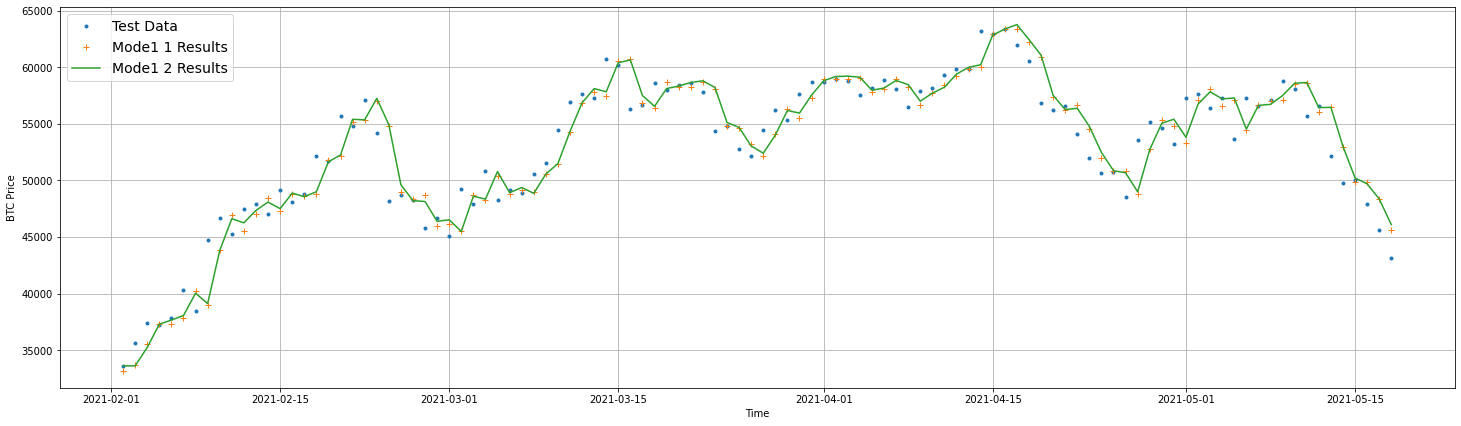

In [51]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format="+",
                 label = "Mode1 1 Results")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 2 Results")


## Model 3: Dense model (window_size = 30, horizon = 8)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30

In [53]:
full_windows, full_labels = make_windows(btc_price, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(2751, 2751)

In [54]:
for i in range(3):
  print(f'Windows: {full_windows[i]} - > Label: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] - > Label: [196.02499 198.04883 198.93233 200.543   210.3075  225.02    248.25333]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] - > Label: [198.04883 198.93233 200.543   210.3075  225.02    248.25333 262.32666]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.6333

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [56]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
], name = 'model_3_dense')

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1483.9858 - mae: 1483.9858 - mse: 10626957.0000 

18/18 [==============================] - 2s 39ms/step - loss: 1483.9858 - mae: 1483.9858 - mse: 10626957.0000 - val_loss: 2526.0901 - val_mae: 2526.0901 - val_mse: 16897850.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 493.4583 - mae: 493.4583 - mse: 1137322.3750

18/18 [==============================] - 1s 31ms/step - loss: 493.4583 - mae: 493.4583 - mse: 1137322.3750 - val_loss: 2389.4023 - val_mae: 2389.4023 - val_mse: 18325666.0000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 393.2224 - mae: 393.2224 - mse: 792710.3125

18/18 [==============================] - 1s 29ms/step - loss: 393.2224 - mae: 393.2224 - mse: 792710.3125 - val_loss: 1975.8149 - val_mae: 1975.8149 - val_mse: 11813318.0000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 355.2005 - mae: 355.2005 - mse: 661834.5000

18/18 [==============================] - 1s 29ms/step - loss: 354.5221 - mae: 354.5221 - mse: 657843.5000 - val_loss: 1765.2399 - val_mae: 1765.2399 - val_mse: 10016158.0000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 329.5797 - mae: 329.5797 - mse: 578480.4375 - val_loss: 1833.0057 - val_mae: 1833.0057 - val_mse: 10426682.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 314.9871 - mae: 314.9871 - mse: 533086.0625 - val_loss: 1781.7729 - val_mae: 1781.7729 - val_mse: 9737492.0000
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 308.1486 - mae: 308.1486 - mse: 508199.8438

18/18 [==============================] - 1s 29ms/step - loss: 304.5637 - mae: 304.5637 - mse: 497500.0938 - val_loss: 1595.6742 - val_mae: 1595.6742 - val_mse: 8337778.0000
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 299.6869 - mae: 299.6869 - mse: 470454.1250 - val_loss: 1627.8735 - val_mae: 1627.8735 - val_mse: 8549477.0000
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 290.5423 - mae: 290.5423 - mse: 444113.6562 - val_loss: 1722.2137 - val_mae: 1722.2137 - val_mse: 9212149.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 235.0898 - mae: 235.0898 - mse: 223995.2344

18/18 [==============================] - 0s 29ms/step - loss: 294.7744 - mae: 294.7744 - mse: 441804.5938 - val_loss: 1528.9021 - val_mae: 1528.9021 - val_mse: 7550735.0000
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 279.6431 - mae: 279.6431 - mse: 408632.0938

18/18 [==============================] - 0s 28ms/step - loss: 279.6431 - mae: 279.6431 - mse: 408632.0938 - val_loss: 1481.5698 - val_mae: 1481.5698 - val_mse: 7274252.0000
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 275.9831 - mae: 275.9831 - mse: 403451.5000 - val_loss: 1625.5801 - val_mae: 1625.5801 - val_mse: 8180988.0000
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 276.0273 - mae: 276.0273 - mse: 392177.4688 - val_loss: 1487.3105 - val_mae: 1487.3105 - val_mse: 7420282.5000
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 267.4839 - mae: 267.4839 - mse: 375601.1250

18/18 [==============================] - 1s 42ms/step - loss: 267.4839 - mae: 267.4839 - mse: 375601.1250 - val_loss: 1470.6334 - val_mae: 1470.6334 - val_mse: 7169146.0000
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 265.9306 - mae: 265.9306 - mse: 374782.9375 - val_loss: 1570.9994 - val_mae: 1570.9994 - val_mse: 7584666.5000
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 265.5726 - mae: 265.5726 - mse: 365122.9062 - val_loss: 1484.6792 - val_mae: 1484.6792 - val_mse: 7095418.5000
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 264.9853 - mae: 264.9853 - mse: 365970.3438 - val_loss: 1646.5898 - val_mae: 1646.5898 - val_mse: 8197918.0000
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 267.8267 - mae: 267.8267 - mse: 364634.1562 - val_loss: 1588.5569 - val_mae: 1588.5569 - val_mse: 7700136.5000
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 259.0208 - ma

18/18 [==============================] - 1s 29ms/step - loss: 271.6389 - mae: 271.6389 - mse: 363783.7812 - val_loss: 1458.3074 - val_mae: 1458.3074 - val_mse: 6843145.0000
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 252.5281 - mae: 252.5281 - mse: 334600.2188

18/18 [==============================] - 1s 30ms/step - loss: 252.5281 - mae: 252.5281 - mse: 334600.2188 - val_loss: 1394.0955 - val_mae: 1394.0955 - val_mse: 6529581.5000
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 253.0777 - mae: 253.0777 - mse: 334900.3125 - val_loss: 1469.7505 - val_mae: 1469.7505 - val_mse: 6883750.5000
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 260.4545 - mae: 260.4545 - mse: 343711.2188 - val_loss: 1417.0992 - val_mae: 1417.0992 - val_mse: 6649899.0000
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 274.8452 - mae: 274.8452 - mse: 371689.2500 - val_loss: 1447.9789 - val_mae: 1447.9789 - val_mse: 6815879.5000
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 262.2722 - mae: 262.2722 - mse: 341125.8750 - val_loss: 1701.3185 - val_mae: 1701.3185 - val_mse: 8187991.5000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 255.3877 - ma

18/18 [==============================] - 1s 43ms/step - loss: 242.1070 - mae: 242.1070 - mse: 311265.4688 - val_loss: 1385.8766 - val_mae: 1385.8766 - val_mse: 6429791.0000
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 248.5042 - mae: 248.5042 - mse: 327253.7188

18/18 [==============================] - 1s 42ms/step - loss: 247.7458 - mae: 247.7458 - mse: 318087.8438 - val_loss: 1356.6202 - val_mae: 1356.6202 - val_mse: 6165807.5000
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 244.3602 - mae: 244.3602 - mse: 312857.3750 - val_loss: 1387.8926 - val_mae: 1387.8926 - val_mse: 6338668.5000
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 244.1214 - mae: 244.1214 - mse: 312188.4688 - val_loss: 1380.3210 - val_mae: 1380.3210 - val_mse: 6254089.0000
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 243.9576 - mae: 243.9576 - mse: 309358.9375 - val_loss: 1403.2009 - val_mae: 1403.2009 - val_mse: 6431332.5000
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 243.6976 - mae: 243.6976 - mse: 312928.0938 - val_loss: 1376.6887 - val_mae: 1376.6887 - val_mse: 6397687.0000
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 252.2611 - ma

18/18 [==============================] - 0s 29ms/step - loss: 245.3397 - mae: 245.3397 - mse: 313136.3125 - val_loss: 1353.8834 - val_mae: 1353.8834 - val_mse: 6145355.5000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 271.5454 - mae: 271.5454 - mse: 399363.3750

18/18 [==============================] - 0s 28ms/step - loss: 235.5643 - mae: 235.5643 - mse: 291454.1250 - val_loss: 1310.2179 - val_mae: 1310.2179 - val_mse: 5913313.0000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 238.3909 - mae: 238.3909 - mse: 299012.4062 - val_loss: 1394.9485 - val_mae: 1394.9485 - val_mse: 6258103.5000
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 240.0507 - mae: 240.0507 - mse: 299458.6562 - val_loss: 1499.6464 - val_mae: 1499.6464 - val_mse: 6811325.0000
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 241.5755 - mae: 241.5755 - mse: 300987.7500 - val_loss: 1324.6350 - val_mae: 1324.6350 - val_mse: 5931924.5000
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 237.0191 - mae: 237.0191 - mse: 296502.2500 - val_loss: 1387.0999 - val_mae: 1387.0999 - val_mse: 6165638.5000
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 236.4156 - ma

18/18 [==============================] - 1s 62ms/step - loss: 234.9129 - mae: 234.9129 - mse: 287778.7500 - val_loss: 1298.9705 - val_mae: 1298.9705 - val_mse: 5755587.5000
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 232.2372 - mae: 232.2372 - mse: 281995.6875 - val_loss: 1344.9469 - val_mae: 1344.9469 - val_mse: 6023698.5000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 231.0702 - mae: 231.0702 - mse: 284056.0938 - val_loss: 1313.5308 - val_mae: 1313.5308 - val_mse: 5797286.5000
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 234.1239 - mae: 234.1239 - mse: 289541.2812 - val_loss: 1302.1659 - val_mae: 1302.1659 - val_mse: 5779947.0000
Epoch 58/100
18/18 [==============================] - 0s 13ms/step - loss: 229.7052 - mae: 229.7052 - mse: 277295.6562 - val_loss: 1327.3115 - val_mae: 1327.3115 - val_mse: 5830487.0000
Epoch 59/100
18/18 [==============================] - 0s 19ms/step - loss: 233.7566 - 

18/18 [==============================] - 1s 42ms/step - loss: 231.6557 - mae: 231.6557 - mse: 281692.6250 - val_loss: 1271.2428 - val_mae: 1271.2428 - val_mse: 5618004.0000
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 228.3880 - mae: 228.3880 - mse: 279576.3125 - val_loss: 1366.7102 - val_mae: 1366.7102 - val_mse: 6114809.5000
Epoch 62/100
18/18 [==============================] - 0s 17ms/step - loss: 231.2353 - mae: 231.2353 - mse: 280907.4688 - val_loss: 1316.4807 - val_mae: 1316.4807 - val_mse: 5870696.5000
Epoch 63/100
18/18 [==============================] - 0s 14ms/step - loss: 236.3716 - mae: 236.3716 - mse: 287707.3438 - val_loss: 1392.9752 - val_mae: 1392.9752 - val_mse: 6276073.0000
Epoch 64/100
18/18 [==============================] - 0s 13ms/step - loss: 231.1770 - mae: 231.1770 - mse: 280372.1562 - val_loss: 1294.2511 - val_mae: 1294.2511 - val_mse: 5675201.0000
Epoch 65/100
18/18 [==============================] - 0s 9ms/step - loss: 230.8777 -

18/18 [==============================] - 0s 28ms/step - loss: 229.5242 - mae: 229.5242 - mse: 277641.0625 - val_loss: 1261.6818 - val_mae: 1261.6818 - val_mse: 5546634.5000
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 232.3449 - mae: 232.3449 - mse: 275688.6875 - val_loss: 1263.2113 - val_mae: 1263.2113 - val_mse: 5615687.0000
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 227.5096 - mae: 227.5096 - mse: 272988.1875 - val_loss: 1276.9257 - val_mae: 1276.9257 - val_mse: 5521052.5000
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 225.9595 - mae: 225.9595 - mse: 274132.1875 - val_loss: 1332.0923 - val_mae: 1332.0923 - val_mse: 5784683.0000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 226.1267 - mae: 226.1267 - mse: 272201.4688 - val_loss: 1512.8464 - val_mae: 1512.8464 - val_mse: 6791605.0000
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 232.9241 - ma

18/18 [==============================] - 0s 28ms/step - loss: 226.2485 - mae: 226.2485 - mse: 269494.2500 - val_loss: 1260.4485 - val_mae: 1260.4485 - val_mse: 5516812.0000
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 224.2620 - mae: 224.2620 - mse: 268762.8125 - val_loss: 1329.9825 - val_mae: 1329.9825 - val_mse: 5811581.5000
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 236.3857 - mae: 236.3857 - mse: 278052.7500 - val_loss: 1427.5988 - val_mae: 1427.5988 - val_mse: 6255891.0000
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 236.5200 - mae: 236.5200 - mse: 281269.9375 - val_loss: 1651.9213 - val_mae: 1651.9213 - val_mse: 7647344.5000
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 241.4465 - mae: 241.4465 - mse: 283160.3125 - val_loss: 1340.8806 - val_mae: 1340.8806 - val_mse: 5908959.5000
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 239.5537 - ma

18/18 [==============================] - 1s 39ms/step - loss: 230.2639 - mae: 230.2639 - mse: 272372.0000 - val_loss: 1250.1561 - val_mae: 1250.1561 - val_mse: 5369058.5000
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 226.0282 - mae: 226.0282 - mse: 267727.0625 - val_loss: 1253.4583 - val_mae: 1253.4583 - val_mse: 5466064.5000
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 225.1388 - mae: 225.1388 - mse: 269294.6250 - val_loss: 1359.3982 - val_mae: 1359.3982 - val_mse: 5822138.0000
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 228.4551 - mae: 228.4551 - mse: 270087.7188 - val_loss: 1269.3391 - val_mae: 1269.3391 - val_mse: 5484348.5000
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 223.8713 - mae: 223.8713 - mse: 263404.2188 - val_loss: 1317.3695 - val_mae: 1317.3695 - val_mse: 5716620.5000
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 229.6987 - ma

In [57]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1363.9227 - mae: 1363.9227 - mse: 5974019.5000


[1363.9227294921875, 1363.9227294921875, 5974019.5]

In [58]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')

In [59]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1250.1561 - mae: 1250.1561 - mse: 5369058.5000


[1250.1561279296875, 1250.1561279296875, 5369058.5]

In [60]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

model_3_preds[:1]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[9470.749, 9404.283, 9537.469, 9464.856, 9424.558, 9451.221,
        9407.91 ]], dtype=float32)>

In [61]:
def evaluate_preds(y_true, y_pred):

  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     

In [62]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1250.1561,
 'mse': 5369058.5,
 'rmse': 1431.1771,
 'mape': 5.6484594,
 'mase': 2.224583}

In [63]:
naive_results, model_1_results, model_2_results, model_3_results

({'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'mae': 570.11005,
  'mse': 1172815.2,
  'rmse': 1082.966,
  'mape': 2.5379467,
  'mase': 1.0015254},
 {'mae': 567.908,
  'mse': 1172999.2,
  'rmse': 1083.0509,
  'mape': 2.5555043,
  'mase': 0.9976571},
 {'mae': 1250.1561,
  'mse': 5369058.5,
  'rmse': 1431.1771,
  'mape': 5.6484594,
  'mase': 2.224583})

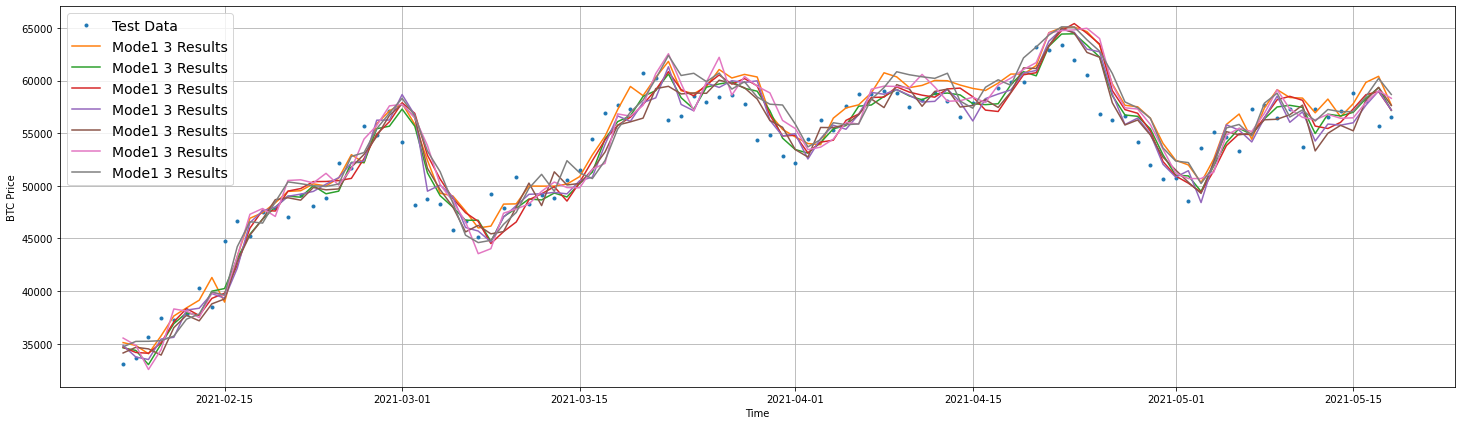

In [64]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_3_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 3 Results")

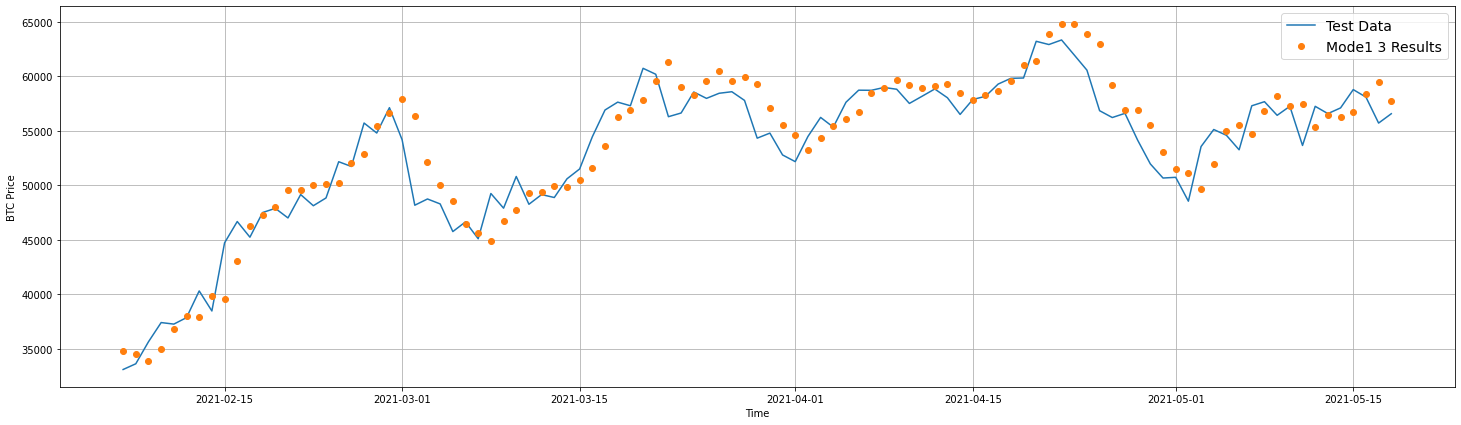

In [65]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 format = '-',
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = tf.reduce_mean(model_3_preds, axis = 1),
                 start = offset,
                 format="o",
                 label = "Mode1 3 Results")

In [66]:
results = pd.DataFrame([naive_results,
                        model_1_results,
                        model_2_results,
                        model_3_results], index = ['model_0',
                                                   'mode_1',
                                                   'model_2',
                                                   'model_3'])

results

,mae,mse,rmse,mape,mase
model_0,567.980225,1147547.00,1071.236206,2.516525,0.999570
mode_1,570.110046,1172815.25,1082.965942,2.537947,1.001525
model_2,567.908020,1172999.25,1083.050903,2.555504,0.997657
model_3,1250.156128,5369058.50,1431.177124,5.648459,2.224583


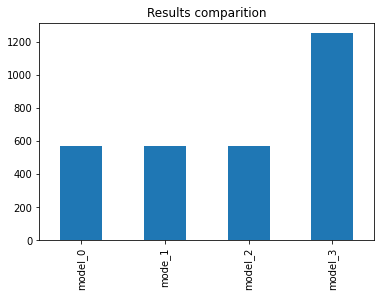

In [67]:
results['mae'].plot(kind = 'bar', title = 'Results comparition');

In [68]:
## Model 4: Conv1D

In [69]:
HORIZON = 1
WINDOW_SIZE = 7

In [70]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(2780, 2780)

In [71]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows),len(train_labels)

(2224, 2224)

In [72]:
train_windows[0].shape

(7,)

In [73]:
x = tf.constant(train_windows[0])

x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [74]:
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [75]:
print(f'Original shape: {x.shape}')
print(f'Expanded shape: {expand_dim_layer(x).shape}')
print(f'Origianl values with expanded shape: \n {expand_dim_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Origianl values with expanded shape: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [76]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [77]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 618.6552 - mae: 618.6552 - mse: 1271609.6250


[618.6552124023438, 618.6552124023438, 1271609.625]

In [79]:
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D/')

In [80]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 569.7365 - mae: 569.7365 - mse: 1173089.7500


[569.7364501953125, 569.7364501953125, 1173089.75]

In [81]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8875.178, 8795.1  , 9011.58 , 8771.651, 8730.693, 8720.634,
       8686.012, 8527.684, 8451.162, 8521.687], dtype=float32)>

In [82]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)

model_4_results

{'mae': 569.73645,
 'mse': 1173089.6,
 'rmse': 1083.0927,
 'mape': 2.5587173,
 'mase': 1.0008692}

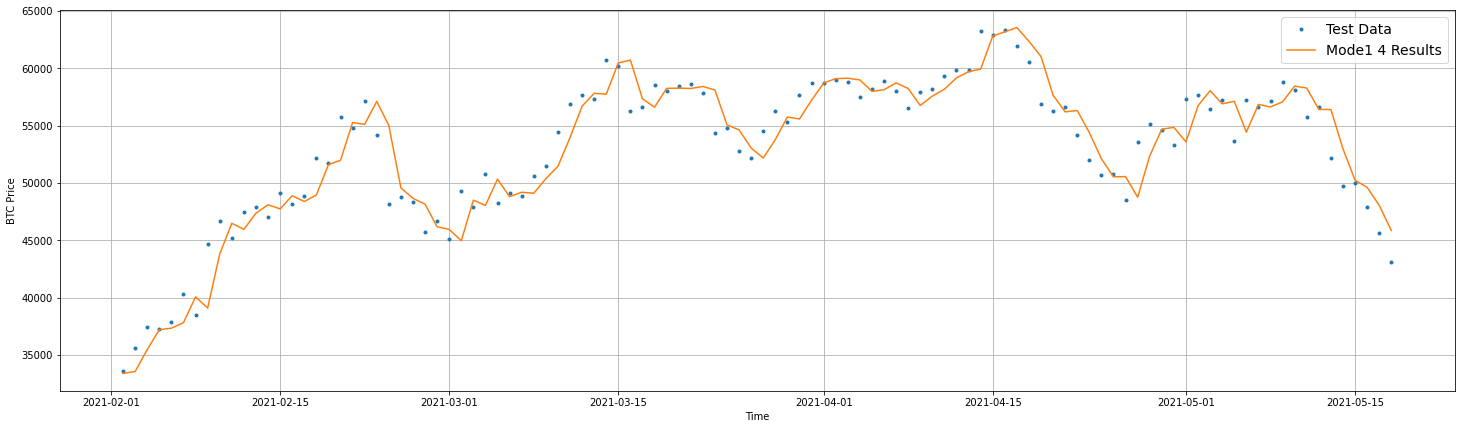

In [83]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_4_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 4 Results")

## Model 5: RNN (LSTM)

In [84]:
tf.random.set_seed(42)


inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation = 'relu')(x)
#x = layers.Dense(32, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs = output, name = 'model_5_lstm')

model_5.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae','mse']
)

model_5.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_5.name)]
)

Epoch 1/100
18/18 [==============================] - 4s 139ms/step - loss: 2728.0449 - mae: 2728.0449 - mse: 18205534.0000 - val_loss: 13042.4082 - val_mae: 13042.4082 - val_mse: 300109088.0000
Epoch 2/100
18/18 [==============================] - 2s 107ms/step - loss: 1082.3347 - mae: 1082.3347 - mse: 3606074.5000 - val_loss: 1298.0151 - val_mae: 1298.0151 - val_mse: 4582187.5000
Epoch 3/100
18/18 [==============================] - 2s 104ms/step - loss: 258.5937 - mae: 258.5937 - mse: 296129.4062 - val_loss: 1179.7411 - val_mae: 1179.7411 - val_mse: 4091554.0000
Epoch 4/100
18/18 [==============================] - 2s 142ms/step - loss: 200.6099 - mae: 200.6099 - mse: 194750.2500 - val_loss: 1038.9113 - val_mae: 1038.9113 - val_mse: 3476956.0000
Epoch 5/100
18/18 [==============================] - 2s 128ms/step - loss: 174.4145 - mae: 174.4145 - mse: 161404.0938 - val_loss: 969.0709 - val_mae: 969.0709 - val_mse: 3020603.0000
Epoch 6/100
18/18 [==============================] - 0s 8ms/s

In [85]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 605.6715 - mae: 605.6715 - mse: 1272485.5000


[605.6715087890625, 605.6715087890625, 1272485.5]

In [86]:
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm')

In [87]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 581.3499 - mae: 581.3499 - mse: 1218638.0000


[581.349853515625, 581.349853515625, 1218638.0]

In [88]:
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 2ms/step


In [89]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)

model_5_results

{'mae': 581.34985,
 'mse': 1218638.1,
 'rmse': 1103.9194,
 'mape': 2.6271012,
 'mase': 1.0212706}

In [90]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [91]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

In [92]:

block_reward_2_date = np.datetime64('2012-11-28')
block_reward_3_date = np.datetime64('2016-07-09')
block_reward_4_date = np.datetime64('2020-05-18')


In [93]:
block_reward_2_date 

numpy.datetime64('2012-11-28')

In [94]:
bitcoin_prices_block_reward = bitcoin_prices.copy()

In [95]:
bitcoin_prices_block_reward['block_reward'] = None

In [96]:
bitcoin_prices_block_reward.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [97]:
bitcoin_prices_block_reward.loc[:block_reward_3_date,['block_reward']] = block_reward_2
bitcoin_prices_block_reward.loc[block_reward_3_date:block_reward_4_date,['block_reward']] = block_reward_3
bitcoin_prices_block_reward.loc[block_reward_4_date:,['block_reward']] = block_reward_4


In [98]:
bitcoin_prices_block_reward.isna().sum()

Price           0
block_reward    0
dtype: int64

In [99]:
bitcoin_prices_block_reward['block_reward'] = bitcoin_prices_block_reward['block_reward'].astype(np.int64)

In [100]:
bitcoin_prices_block_reward.describe()

,Price,block_reward
count,2787.000000,2787.000000
mean,6529.845141,15.932544
std,10887.847444,7.116690
min,108.584830,6.000000
25%,460.087500,12.000000
50%,2780.182500,12.000000
75%,8506.923720,25.000000
max,63346.789035,25.000000


In [101]:
from sklearn.preprocessing import minmax_scale

scaled_btc_prices = pd.DataFrame(minmax_scale(bitcoin_prices_block_reward),
                                 columns = bitcoin_prices_block_reward.columns,
                                 index = bitcoin_prices_block_reward.index)

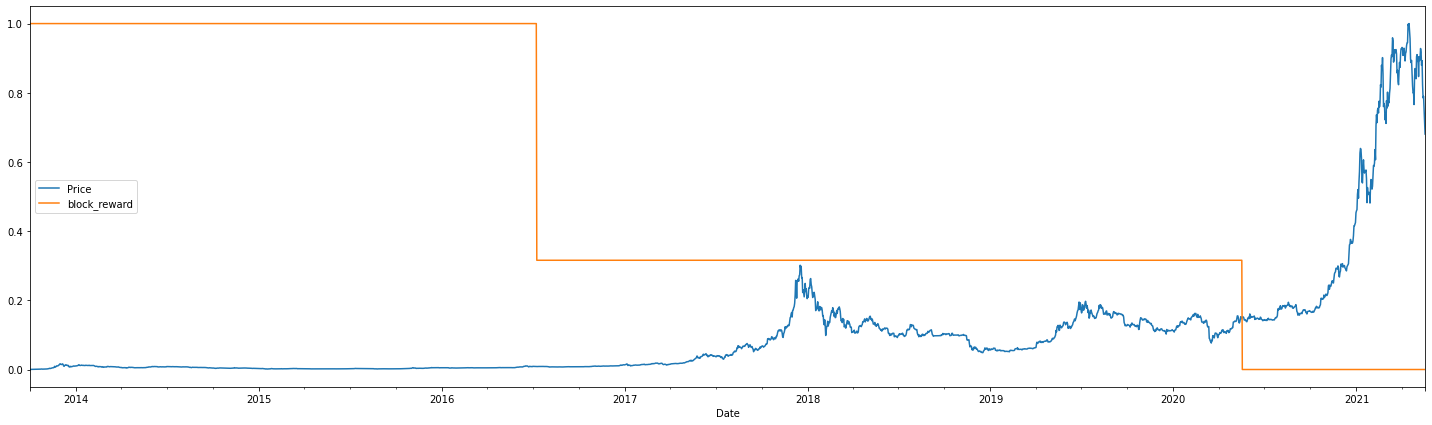

In [102]:

scaled_btc_prices.plot(figsize = (25,7));

## Model 6: Dense (multivariate timer series)

In [107]:


# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7
     


In [109]:


# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block_reward.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)
     


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [110]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [111]:


# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
     


(2224, 2224, 556, 556)

In [112]:


tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])
     


In [113]:


# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)
     


18/18 [==============================] - 0s 2ms/step - loss: 569.4713


569.4712524414062

In [114]:

# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.686 , 8810.126 , 9084.32  , 8739.1875, 8744.6875, 8761.535 ,
       8687.89  , 8508.992 , 8479.792 , 8548.997 ], dtype=float32)>

In [115]:


# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results
     


{'mae': 569.47125,
 'mse': 1161517.0,
 'rmse': 1077.7369,
 'mape': 2.5336728,
 'mase': 1.0004033}

## Model 7: N_BEATS

In [118]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation = 'linear', name = 'theta')

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    
    theta = self.theta_layer(x)
    backcast,forecast = theta[:,:self.input_size], theta[:, -self.horizon]

    return backcast, forecast


In [119]:
dummy_nbeats_block_layer = NBeatsBlock(
    input_size = WINDOW_SIZE,
    theta_size = WINDOW_SIZE + HORIZON,
    horizon = HORIZON,
    n_neurons = 128,
    n_layers =4    
)

In [120]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [121]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

In [124]:
print(f'Backcast: {tf.squeeze(backcast.numpy())}')
print(f'Forecast: {tf.squeeze(forecast.numpy())}')

Backcast: [ 0.55865675 -0.76149726 -0.37237227  0.6870546  -0.6902496   0.2397917
 -0.6782827 ]
Forecast: -0.10181620717048645


In [125]:
HORIZON = 1
WINDOWS_SIZE = 7

In [126]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [127]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

In [128]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [133]:
X = bitcoin_prices_nbeats.dropna().drop('Price', axis = 1)
y = bitcoin_prices_nbeats.dropna()['Price']

split_size = int(len(X)*0.8)

X_train,X_test,y_train,y_test = X[:split_size],X[split_size:],y[:split_size],y[split_size:]

In [134]:
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [135]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [136]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON

THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)